In [3]:
#importing libraries
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [307]:
import time

## Loading Data

In [331]:
data= pd.read_csv('/Users/addynobi/Documents/Essex Jan 22/CE 888 7 SP/Re/in-vehicle-coupon-recommendation.csv')

In [332]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Exploratory Data Analysis

In [333]:
data.shape

(12684, 26)

In [334]:
data.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

From the initial look we can see that there are 24 independent and one dependant variable in our data. Total rows are 12684. The column "Car" has least non-null data. So these could be null or missing values. Few other columns too have non-null data.

In [336]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function above is not showing a true nature of the dataframe since most of the data types are object. Calculations above are done for continuous data types and not for discrete values. One can make out from the "Y" column that 56.84% option 1 has appeared and 49.53 times option 0 has appeared. In other words 56 % people accepted the coupon. Min and Max values also show the categorical nature of attributes. We cannot make much sense from standard deviation values.

In [337]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

We can see that most of the data types are categorical. In-fact the ones which are showing integer are actually not reflecting a continuous attribute which can have any impact on the target variable. So most of these can be treated as object data type. Converting "temperature" into a categorical variable.

In [338]:
data['temperature']=data['temperature'].astype('category')

In [339]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

We can see that there are 6 column with null values. Column 'Car' has maximum null values at 12576 out of total 12684 rows.

In [340]:
data.isnull().sum().sort_values(ascending=False) * 100 /len(data)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

In [341]:
data.duplicated().sum()

74

In [342]:
data.drop_duplicates()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


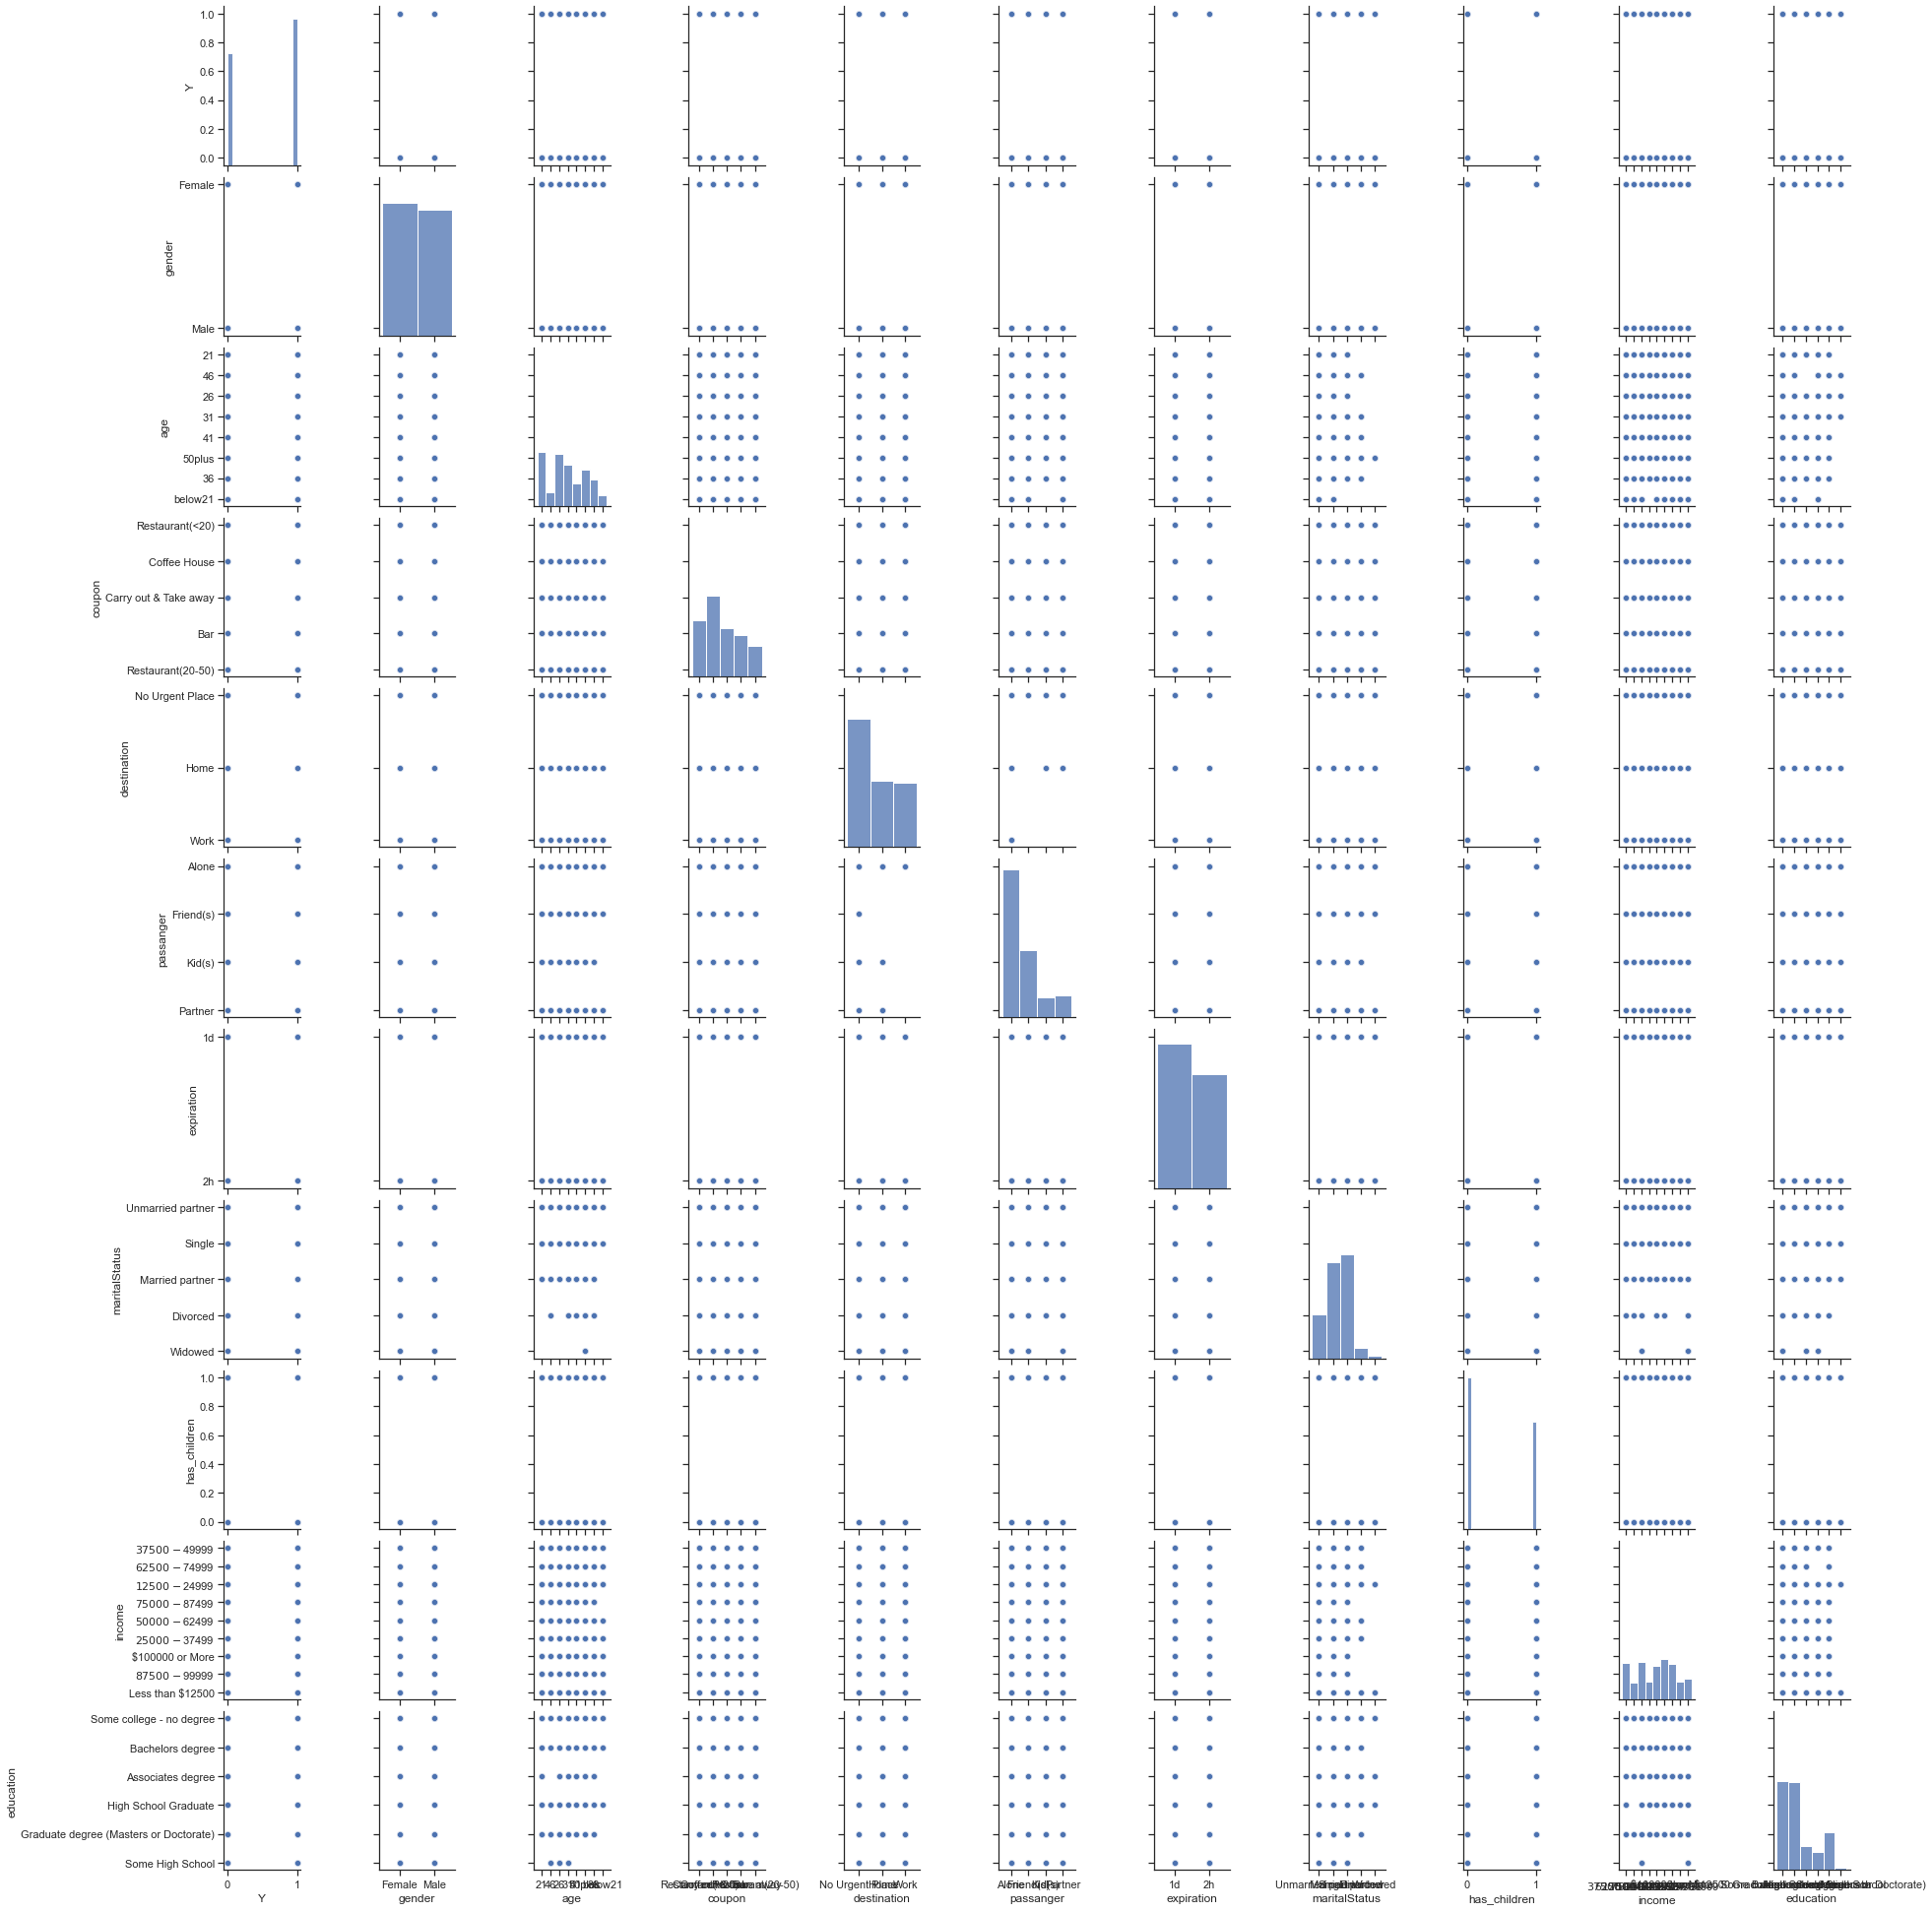

In [277]:
sns.pairplot(data, vars= ['Y', 'gender', 'age', 'coupon', 'destination', 'passanger', 'expiration', 'maritalStatus', 'has_children', 'income', 'education' ])


From the above and beloe pairplot we can see number of classes in each variable. Occupation has the most number of clases at 25. 

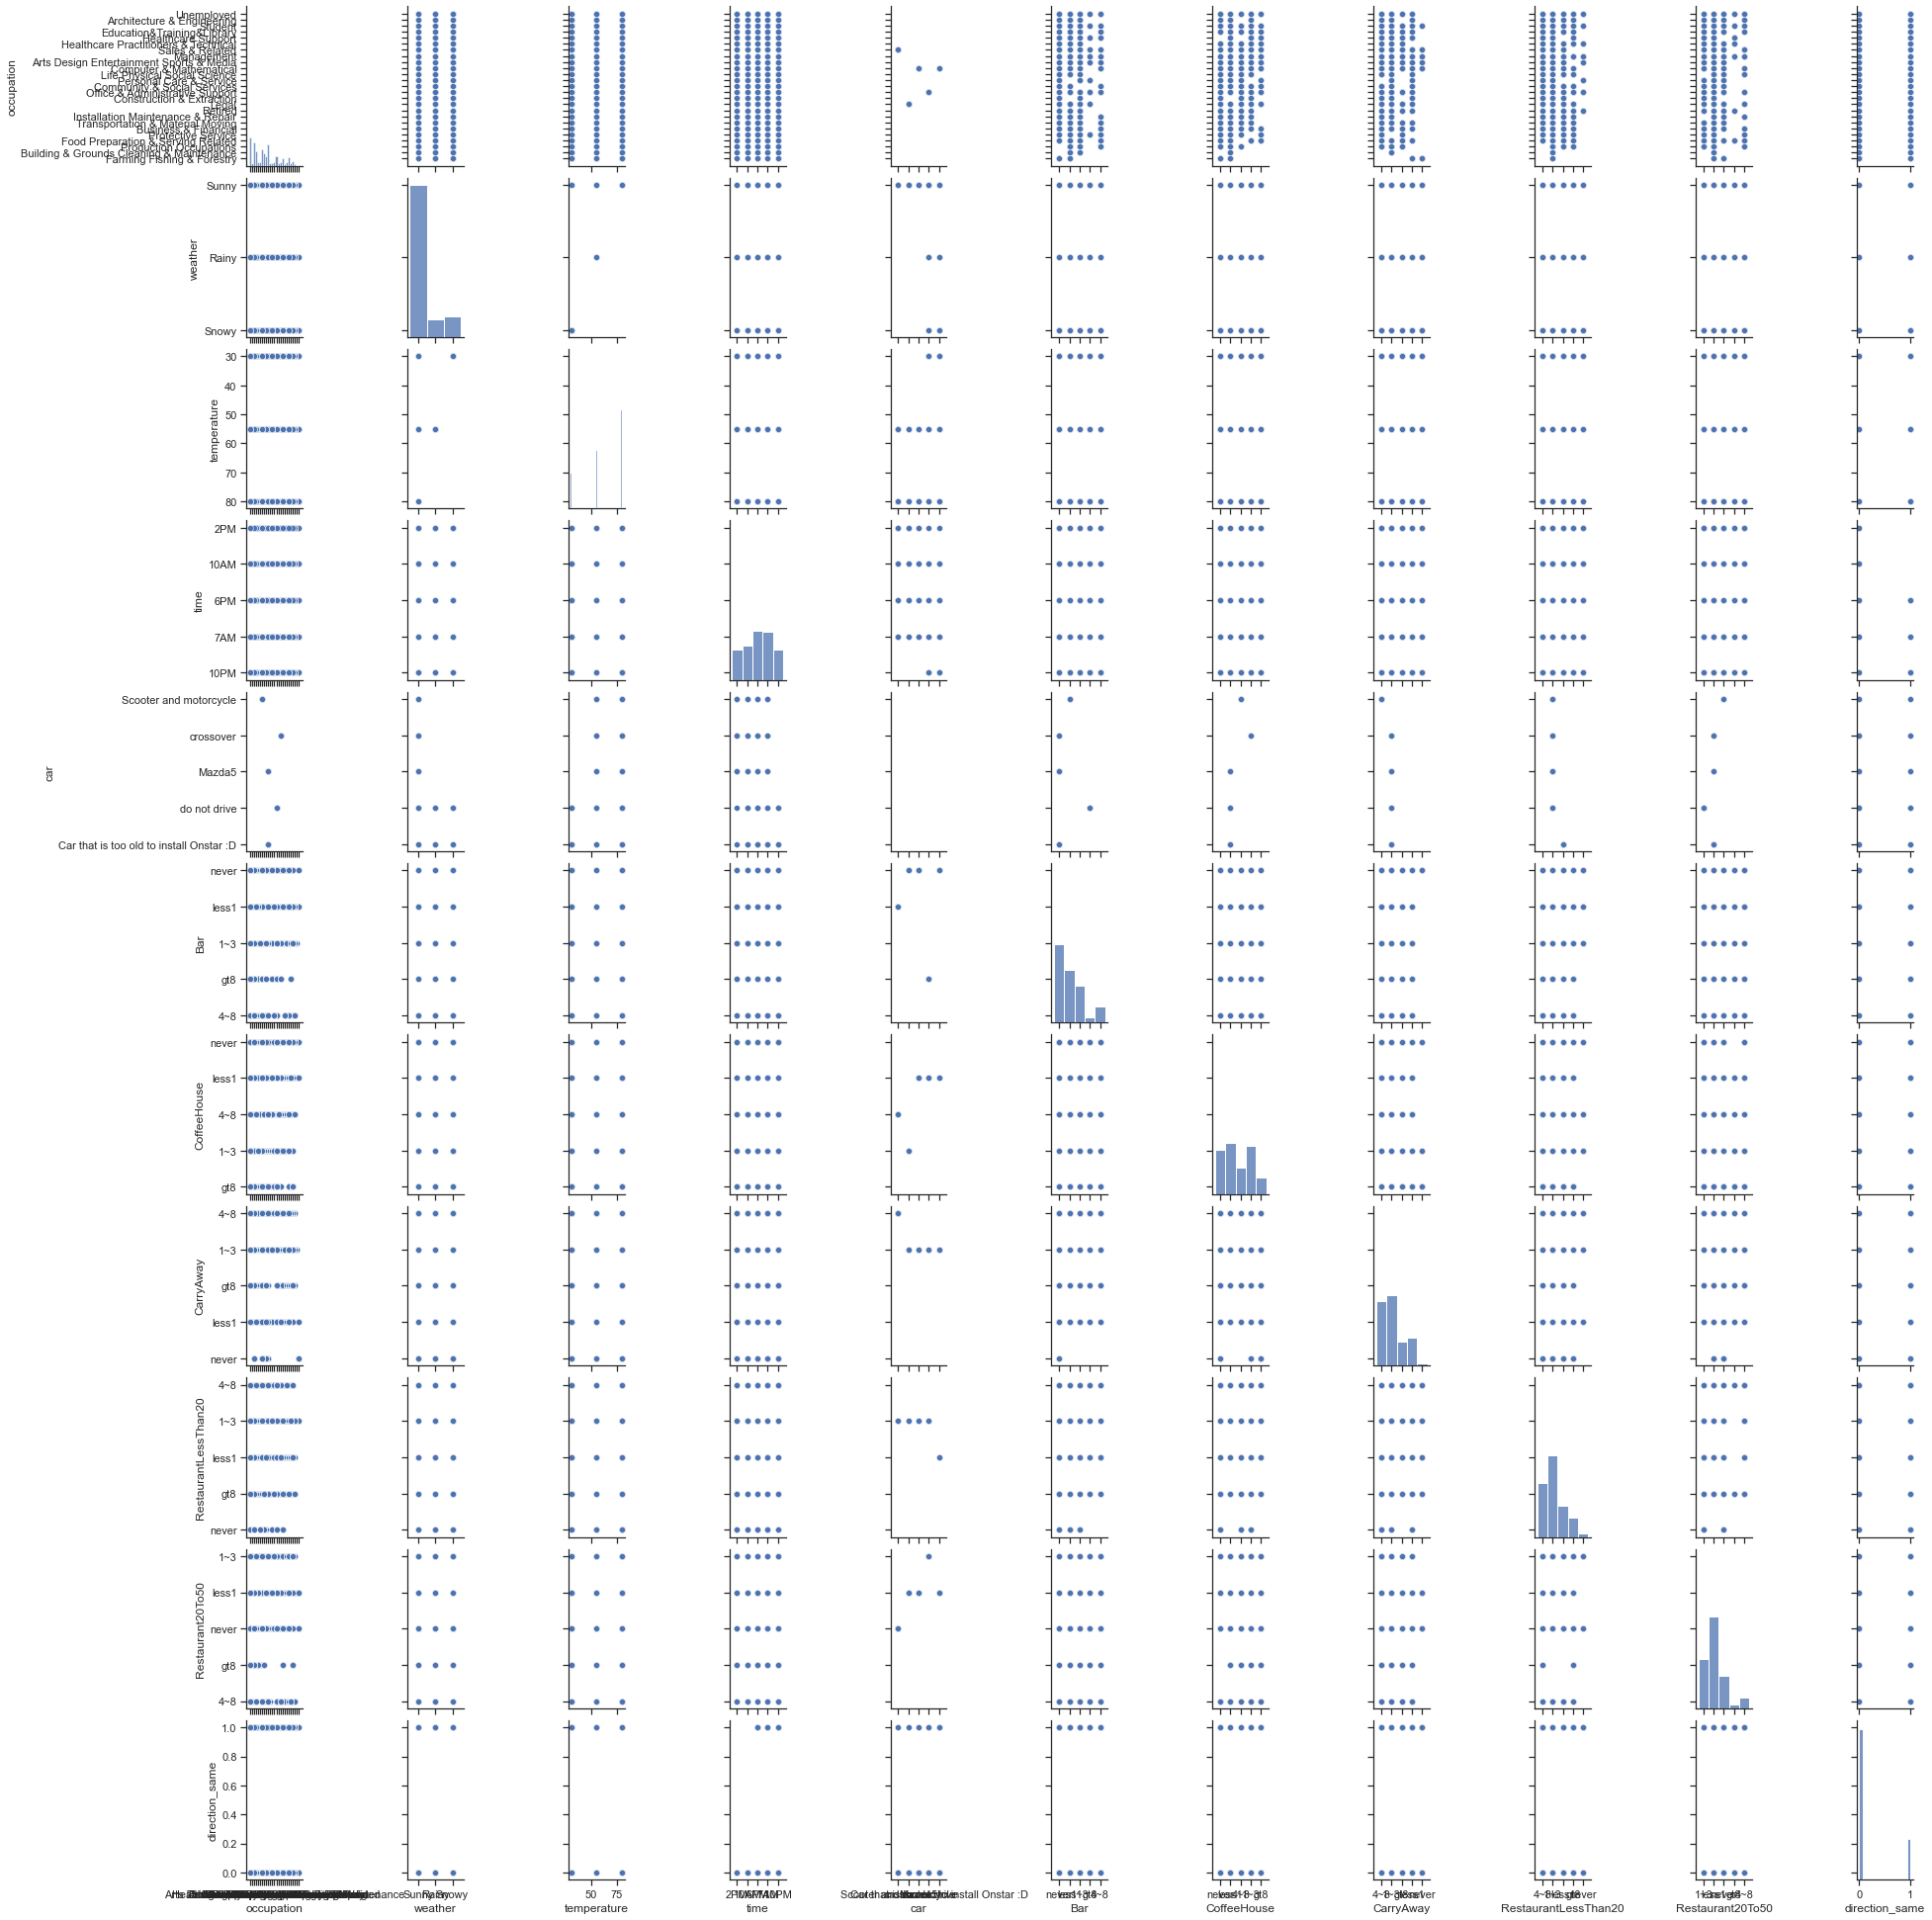

In [278]:
sns.pairplot(data, vars= ['occupation', 'weather', 'temperature', 'time', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'direction_same' ])


In [343]:
data.shape

(12684, 26)

In [344]:
data.isin(['?']).sum(axis=0)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

## Percentage of acceptance and non-acceptance of coupon

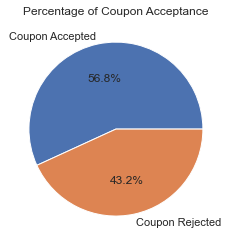

In [345]:
plt.figure(figsize=(8,4))
plt.pie(data.Y.value_counts(),labels=['Coupon Accepted','Coupon Rejected'], autopct='%.1f%%')
plt.title("Percentage of Coupon Acceptance")
plt.show()

From above pie-chart the dataset looks balanced and not much skewed.

## Data Pre-processing

In [346]:
# dropping the "Car' variable since it  has too many null values
data.drop('car',axis=1,inplace=True)
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


In [347]:
#replacing null values with mode
data=data.fillna(data.mode().iloc[0])

In [348]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [349]:
#cconverting object data types to categorical 

data_object = data.select_dtypes(include=['object']).copy()

for col in data_object.columns:
    data[col]=data[col].astype('category')

In [350]:
data.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [351]:
data.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

We can remove the column "toCoupon_GEQ5min" as it has only one class.

In [352]:
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [353]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [354]:
enc = OneHotEncoder(dtype='int64')

data_category = data.select_dtypes(include=['category']).copy()
data_integer = data.select_dtypes(include=['int64']).copy()

data_enc = pd.DataFrame()
for col in data_category.columns:
    enc_output = enc.fit_transform(data_category[[col]])
    df0 = pd.DataFrame(enc_output.toarray(), columns=enc.categories_)
    data_enc = pd.concat([data_enc,df0], axis=1)
    
data_encoded = pd.concat([data_enc, data_integer], axis=1)
data_encoded

#Reference: https://pbpython.com/categorical-encoding.html

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


## Modelling

In [291]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import StratifiedKFold

In [355]:
data_target = data_encoded[['Y']]
data_encoded.drop('Y',inplace=True,axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data_target, test_size=0.3, random_state=42,stratify=data_target)


In [356]:
print(f'X_train :{X_train.shape}')
print(f'y_train :{y_train.shape}')
print(f'X_test :{X_test.shape}')
print(f'y_test :{y_test.shape}')

X_train :(8878, 110)
y_train :(8878, 1)
X_test :(3806, 110)
y_test :(3806, 1)


## Baseline Model

In [357]:
from sklearn.model_selection import cross_val_score

In [358]:
cross_val_score(RandomForestClassifier(n_estimators=60), X_train, y_train)

/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

array([0.75563063, 0.75506757, 0.74662162, 0.74366197, 0.74309859])

In [394]:
from sklearn.metrics import classification_report
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

/var/folders/9l/z5mj1xp14cx0_s3vb7vv6qdm0000gn/T/ipykernel_2456/2531297171.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1643
           1       0.75      0.81      0.78      2163

    accuracy                           0.74      3806
   macro avg       0.73      0.73      0.73      3806
weighted avg       0.74      0.74      0.73      3806



In [360]:
rf.score (X_test, y_test)

0.7346295323173936

In [361]:
print(f'Train Accuracy: {rf.score(X_train, y_train): .3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test): .3f}')

Train Accuracy:  0.998
Test Accuracy:  0.735


In [362]:
clf1 = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [10,20,40,60],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2,7]
    
}, cv=10, return_train_score=False)
clf1.fit(X_train, y_train)
clf1.cv_results_

/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

{'mean_fit_time': array([0.02513928, 0.03452299, 0.06543188, 0.09626386, 0.01939261,
        0.03457108, 0.07443204, 0.09825602, 0.03375418, 0.06166987,
        0.11997066, 0.17732103, 0.03263791, 0.06115582, 0.11803446,
        0.17441833]),
 'std_fit_time': array([0.01083589, 0.00053224, 0.00131471, 0.00109885, 0.00031419,
        0.00050433, 0.0238758 , 0.00209443, 0.00230175, 0.00164138,
        0.00280978, 0.00663966, 0.001315  , 0.00149307, 0.00174607,
        0.00199682]),
 'mean_score_time': array([0.00228353, 0.00258319, 0.00399175, 0.00531824, 0.0019366 ,
        0.00264337, 0.00413871, 0.00564015, 0.0025178 , 0.00326552,
        0.00517633, 0.00694518, 0.00236692, 0.00324812, 0.00510449,
        0.00694427]),
 'std_score_time': array([8.16425578e-04, 5.18266331e-05, 1.42391320e-04, 3.08096625e-04,
        4.81303340e-05, 1.49848740e-04, 3.20074416e-04, 5.13485689e-04,
        2.16060283e-04, 4.74726296e-05, 1.54218398e-04, 1.89260080e-04,
        1.52648459e-04, 4.64113717e-

In [363]:
dfrf = pd.DataFrame(clf1.cv_results_)
dfrf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025139,0.010836,0.002284,0.000816,2,auto,10,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.605856,0.608108,...,0.615991,0.590090,0.601351,0.595721,0.585586,0.599775,0.582864,0.599232,0.010092,9
1,0.034523,0.000532,0.002583,0.000052,2,auto,20,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.594595,0.596847,...,0.610360,0.591216,0.583333,0.601351,0.581081,0.578354,0.588501,0.590897,0.009545,11
2,0.065432,0.001315,0.003992,0.000142,2,auto,40,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.574324,0.582207,...,0.591216,0.586712,0.585586,0.618243,0.594595,0.573844,0.602029,0.588195,0.013463,14
3,0.096264,0.001099,0.005318,0.000308,2,auto,60,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.572072,0.590090,...,0.588964,0.585586,0.586712,0.596847,0.585586,0.586246,0.585118,0.586956,0.006082,15
4,0.019393,0.000314,0.001937,0.000048,2,sqrt,10,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.590090,0.593468,...,0.601351,0.597973,0.575450,0.644144,0.592342,0.586246,0.579481,0.596528,0.018080,10
5,0.034571,0.000504,0.002643,0.000150,2,sqrt,20,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.596847,0.595721,...,0.582207,0.596847,0.586712,0.596847,0.578829,0.593010,0.583991,0.588421,0.008199,13
6,0.074432,0.023876,0.004139,0.000320,2,sqrt,40,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.581081,0.594595,...,0.585586,0.591216,0.586712,0.595721,0.583333,0.581736,0.569335,0.584589,0.007696,16
7,0.098256,0.002094,0.005640,0.000513,2,sqrt,60,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.586712,0.588964,...,0.596847,0.594595,0.579955,0.595721,0.585586,0.600902,0.586246,0.589548,0.006818,12
8,0.033754,0.002302,0.002518,0.000216,7,auto,10,"{'max_depth': 7, 'max_features': 'auto', 'n_es...",0.721847,0.708333,...,0.717342,0.685811,0.671171,0.711712,0.699324,0.687711,0.713641,0.702635,0.015410,7
9,0.061670,0.001641,0.003266,0.000047,7,auto,20,"{'max_depth': 7, 'max_features': 'auto', 'n_es...",0.712838,0.712838,...,0.693694,0.694820,0.700450,0.733108,0.692568,0.704622,0.693348,0.703085,0.012544,6


In [364]:
dfrf[['param_n_estimators','param_max_features', 'param_max_depth','mean_test_score']]

,param_n_estimators,param_max_features,param_max_depth,mean_test_score
0,10,auto,2,0.599232
1,20,auto,2,0.590897
2,40,auto,2,0.588195
3,60,auto,2,0.586956
4,10,sqrt,2,0.596528
5,20,sqrt,2,0.588421
6,40,sqrt,2,0.584589
7,60,sqrt,2,0.589548
8,10,auto,7,0.702635
9,20,auto,7,0.703085


In [365]:
# Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
score_GNB = GNB.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes model is', score_GNB)
print(classification_report(y_test, y_pred))

The accuracy of Gaussian Naive Bayes model is 0.6124540199684708
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1643
           1       0.68      0.60      0.64      2163

    accuracy                           0.61      3806
   macro avg       0.61      0.61      0.61      3806
weighted avg       0.62      0.61      0.61      3806



/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [366]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)
print(classification_report(y_test, y_pred))

/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the KNN Model is 0.6539674198633736
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1643
           1       0.68      0.73      0.71      2163

    accuracy                           0.65      3806
   macro avg       0.65      0.64      0.64      3806
weighted avg       0.65      0.65      0.65      3806



In [399]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear'],
            'random_state' : [None]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
             'n_estimators': [10,20,40,60],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [2,7]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'random_state' : [None],
            'fit_intercept': [True]
        }
    }
}

## Results

In [392]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/addynobi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

,model,best_score,best_params
0,svm,0.743635,"{'C': 20, 'kernel': 'rbf', 'random_state': None}"
1,random_forest,0.710631,"{'max_depth': 7, 'max_features': 'sqrt', 'n_es..."
2,logistic_regression,0.684723,"{'C': 1, 'fit_intercept': True, 'random_state'..."


The best model comes to be SVM with hyoer-parametric tunning and best parameters as C = 20, Kernel = rbf and random state as None. The base line model is giving performance of apprx 74%.